In [106]:
import torch
import math
import matplotlib.pyplot as plt
import numpy

tensor([-6.2832e+00, -6.0319e+00, -5.7805e+00, -5.5292e+00, -5.2779e+00,
        -5.0265e+00, -4.7752e+00, -4.5239e+00, -4.2726e+00, -4.0212e+00,
        -3.7699e+00, -3.5186e+00, -3.2673e+00, -3.0159e+00, -2.7646e+00,
        -2.5133e+00, -2.2619e+00, -2.0106e+00, -1.7593e+00, -1.5080e+00,
        -1.2566e+00, -1.0053e+00, -7.5398e-01, -5.0265e-01, -2.5133e-01,
         5.5806e-15,  2.5133e-01,  5.0265e-01,  7.5398e-01,  1.0053e+00,
         1.2566e+00,  1.5080e+00,  1.7593e+00,  2.0106e+00,  2.2619e+00,
         2.5133e+00,  2.7646e+00,  3.0159e+00,  3.2673e+00,  3.5186e+00,
         3.7699e+00,  4.0212e+00,  4.2726e+00,  4.5239e+00,  4.7752e+00,
         5.0265e+00,  5.2779e+00,  5.5292e+00,  5.7805e+00,  6.0319e+00])


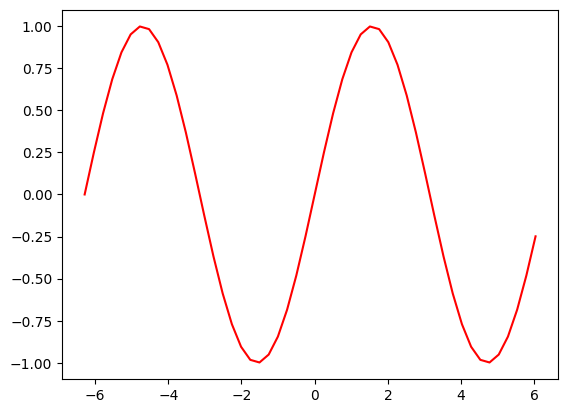

In [107]:
EPOCH=2000
MLP_LR=0.06
PI=math.pi
left,right=-2,2
NUM=50
x=torch.tensor([(num*PI) for num in numpy.arange(left,right,(right-left)/NUM)],dtype=torch.float32)
print (x)
y=torch.sin(x)
plt.plot(x,y,color='red')
plt.show()


In [108]:
class MLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=torch.nn.Linear(1,20)
        self.layer2=torch.nn.Linear(20,20)
        self.layer3=torch.nn.Linear(20,1)
    
    def forward(self,x):
        x=self.layer1(x)
        x=torch.nn.functional.relu(x)

        x=self.layer2(x)
        x=torch.nn.functional.relu(x)

        x=self.layer3(x)

        return  x

In [109]:
mlp=MLP()

# input_x和labels是训练网络时候用的输入和标签。
input_x=x.reshape(-1, 1)
labels=y.reshape(-1,1)
labels=labels

#训练mlp
mlp_optimizer=torch.optim.Adam(mlp.parameters(), lr=MLP_LR)
scheduler = torch.optim.lr_scheduler.ExponentialLR(mlp_optimizer, gamma=0.998)
lr_history = []
mlp_loss=[]

for epoch in range(EPOCH):
    lr_history.append(mlp_optimizer.param_groups[0]['lr'])
    preds=mlp(input_x)
    loss=torch.nn.functional.mse_loss(preds,labels)
    mlp_optimizer.zero_grad()
    loss.backward()
    mlp_optimizer.step()
    scheduler.step()
    mlp_loss.append(loss.item())

  
    # print('1:   ',loss.item())

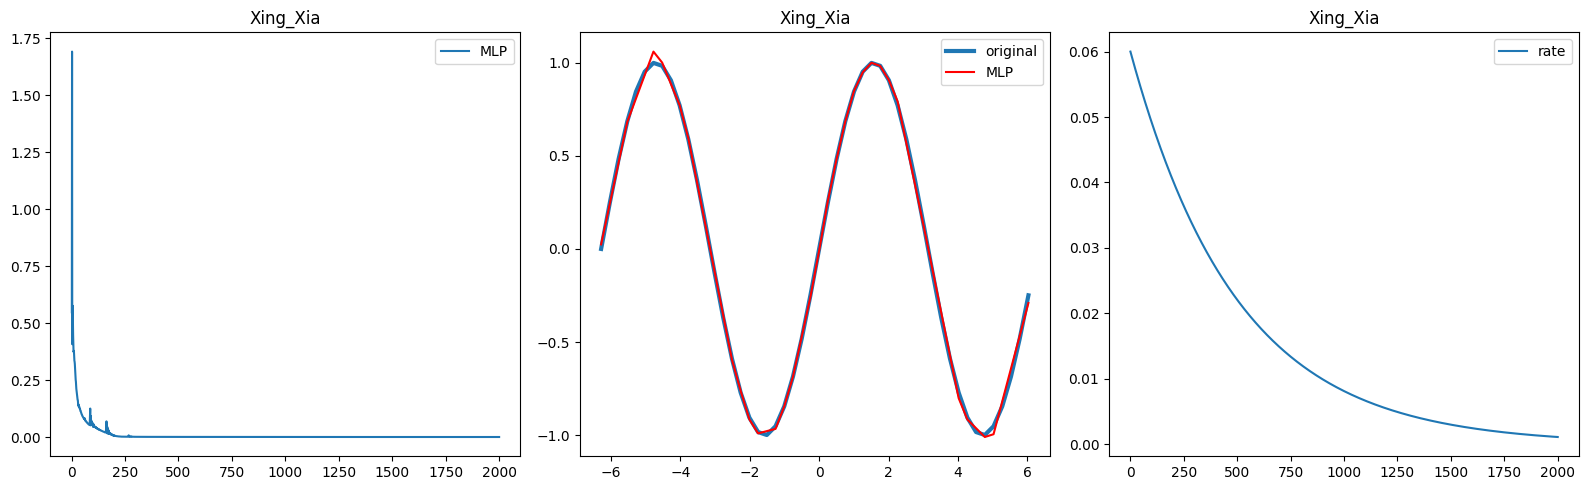

In [110]:
def PlotMLP(mlp,  input_x, x):
    # input_x 是输入网络的x。
    # sin_x 是列表，x的取值，一维数据、
    # 虽然他们的内容（不是维度）是一样的。可以print shape看一下。
    mlp_eval = mlp.eval()
    # mlp_y_np=[]
    # rnn_y_np=[]
    mlp_y = mlp_eval(input_x)
    # for i in range(mlp_y):
    #     mlp_y_np.append(i.detach().numpy())
    # for i in range(rnn_y):
    #     rnn_y_np.append(i.detach().numpy())
    mlp_y_np=mlp_y.cpu().detach().numpy()

    plt.figure(figsize=(16, 5))

    plt.subplot(131)
    plt.plot([i + 1 for i in range(EPOCH)], mlp_loss, label='MLP')
    plt.title('Xing_Xia')
    plt.legend()

    plt.subplot(132)
    plt.plot(x, torch.sin(x), label="original", linewidth=3)
    plt.plot(x, [y[0] for y in mlp_y_np], label='MLP',color='red')
    plt.title('Xing_Xia')
    plt.legend()
    plt.subplot(133)
    plt.plot([i + 1 for i in range(EPOCH)],lr_history, label='rate')
    plt.title('Xing_Xia')
    plt.legend()

    plt.tight_layout()
    plt.show()
PlotMLP(mlp,input_x,x)